In [24]:
import scipy.io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [25]:
data = scipy.io.loadmat('MNISTmini.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_fea1', 'train_gnd1', 'test_fea1', 'test_gnd1'])


In [26]:
training_set = data['train_fea1']/255
training_label = data['train_gnd1']
testing_set = data['test_fea1']/255
testing_label = data['test_gnd1']

print(training_set.shape)
print(testing_set.shape)
print(training_set[0])

(60000, 100)
(10000, 100)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.25098039
 0.         0.         0.         0.         0.         0.
 0.         0.91764706 1.         0.99215686 0.         0.
 0.         0.         0.         0.31372549 0.98431373 0.98431373
 0.99215686 0.         0.         0.         0.         0.
 0.80392157 0.98431373 0.98431373 0.04705882 0.         0.
 0.         0.         0.26666667 0.99215686 0.98431373 0.09019608
 0.         0.         0.         0.         0.         0.95686275
 0.98431373 0.74117647 0.         0.         0.         0.
 0.         0.         0.         0.99215686 0.12156863 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

In [27]:
new_training_set = np.append(training_set, training_label, axis=1)
print(new_training_set[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.56862745 0.68627451
 0.74901961 0.49019608 0.         0.         0.         0.
 0.         0.         0.82745098 0.98823529 0.98823529 0.98823529
 0.99215686 0.98823529 0.99215686 0.98823529 0.85490196 0.28627451
 0.         0.         0.         0.42352941 0.42352941 0.42352941
 0.66666667 0.98823529 0.99215686 0.98823529 0.         0.
 0.         0.         0.         0.         0.         0.
 0.1372549  0.1372549  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

In [28]:
index5 = np.where(training_label == 5)[0][0]
index8 = np.where(training_label == 8)[0][0]

training = np.concatenate((new_training_set[index5:(index5+500)], new_training_set[index8:(index8+500)]))
training = sorted(training, key=lambda k: random.random())
training = np.array(training).reshape(1000, 101)

validation = np.concatenate((new_training_set[(index5+500):(index5+1000)], new_training_set[(index8+500):(index8+1000)]))
validation = sorted(validation, key=lambda k: random.random())
validation = np.array(validation).reshape(1000, 101)

testing = np.concatenate((new_training_set[(index5+1000):(index5+1500)], new_training_set[(index8+1000):(index8+1500)]))
testing = sorted(testing, key=lambda k: random.random())
testing = np.array(testing).reshape(1000, 101)

In [29]:
# print(type(training))

# for i in range(len(training)):
#     plt.imshow(training[i][0:100].reshape(10,10), cmap='gray')
#     plt.show()

In [30]:
X = training[:,0:100]
# print(X.shape)

y = training[:,100]
# print(y.shape)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
import pickle as pk
n = 20
compiled_models = []


Cs = [1.0, 0.01, 0.001, 0.0001, 0.00001]
tolerances = [0.001, 0.0001]
duals = [True, False]
penalties = ['l2', 'l1', 'elasticnet']
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [10000, 25000, 50000]
class_weights = ['balanced', 'None']

counter = 0

for C in Cs:
    for tol in tolerances:
        for dual in duals:
            for penalty in penalties:
                for solver in solvers:
                    for max_iter in max_iters:
                        for class_weight in class_weights:
                        
                            print(f"Compiled Model: {counter}\n")

                            try:
                                model = LogisticRegression(penalty=penalty, 
                                                           dual=dual, 
                                                           tol=tol, 
                                                           C=C, 
                                                           solver=solver, 
                                                           max_iter=max_iter, 
                                                           class_weight = class_weight).fit(X, y)
                            except:
                                counter += 1
                                continue

                            compiled_models.append([float(model.score(training[:, 0:100], training[:,100])), model])
                            counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
#     filename = f'PIKLE/Logisitic_Reg_{i}'
#     pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

Compiled Model: 519

Compiled Model: 520

Compiled Model: 521

Compiled Model: 522

Compiled Model: 523

Compiled Model: 524

Compiled Model: 525

Compiled Model: 526

Compiled Model: 527

Compiled Model: 528

Compiled Model: 529

Compiled Model: 530

Compiled Model: 531

Compiled Model: 532

Compiled Model: 533

Compiled Model: 534

Compiled Model: 535

Compiled Model: 536

Compiled Model: 537

Compiled Model: 538

Compiled Model: 539

Compiled Model: 540

Compiled Model: 541

Compiled Model: 542

Compiled Model: 543

Compiled Model: 544

Compiled Model: 545

Compiled Model: 546

Compiled Model: 547

Compiled Model: 548

Compiled Model: 549

Compiled Model: 550

Compiled Model: 551

Compiled Model: 552

Compiled Model: 553

Compiled Model: 554

Compiled Model: 555

Compiled Model: 556

Compiled Model: 557

Compiled Model: 558

Compiled Model: 559

Compiled Model: 560

Compiled Model: 561

Compiled Model: 562

Compiled Model: 563

Compiled Model: 564

Compiled Model: 565

Compiled Mode

Compiled Model: 955

Compiled Model: 956

Compiled Model: 957

Compiled Model: 958

Compiled Model: 959

Compiled Model: 960

Compiled Model: 961

Compiled Model: 962

Compiled Model: 963

Compiled Model: 964

Compiled Model: 965

Compiled Model: 966

Compiled Model: 967

Compiled Model: 968

Compiled Model: 969

Compiled Model: 970

Compiled Model: 971

Compiled Model: 972

Compiled Model: 973

Compiled Model: 974

Compiled Model: 975

Compiled Model: 976

Compiled Model: 977

Compiled Model: 978

Compiled Model: 979

Compiled Model: 980

Compiled Model: 981

Compiled Model: 982

Compiled Model: 983

Compiled Model: 984

Compiled Model: 985

Compiled Model: 986

Compiled Model: 987

Compiled Model: 988

Compiled Model: 989

Compiled Model: 990

Compiled Model: 991

Compiled Model: 992

Compiled Model: 993

Compiled Model: 994

Compiled Model: 995

Compiled Model: 996

Compiled Model: 997

Compiled Model: 998

Compiled Model: 999

Compiled Model: 1000

Compiled Model: 1001

Compiled Mo

Compiled Model: 1383

Compiled Model: 1384

Compiled Model: 1385

Compiled Model: 1386

Compiled Model: 1387

Compiled Model: 1388

Compiled Model: 1389

Compiled Model: 1390

Compiled Model: 1391

Compiled Model: 1392

Compiled Model: 1393

Compiled Model: 1394

Compiled Model: 1395

Compiled Model: 1396

Compiled Model: 1397

Compiled Model: 1398

Compiled Model: 1399

Compiled Model: 1400

Compiled Model: 1401

Compiled Model: 1402

Compiled Model: 1403

Compiled Model: 1404

Compiled Model: 1405

Compiled Model: 1406

Compiled Model: 1407

Compiled Model: 1408

Compiled Model: 1409

Compiled Model: 1410

Compiled Model: 1411

Compiled Model: 1412

Compiled Model: 1413

Compiled Model: 1414

Compiled Model: 1415

Compiled Model: 1416

Compiled Model: 1417

Compiled Model: 1418

Compiled Model: 1419

Compiled Model: 1420

Compiled Model: 1421

Compiled Model: 1422

Compiled Model: 1423

Compiled Model: 1424

Compiled Model: 1425

Compiled Model: 1426

Compiled Model: 1427

Compiled M

In [ ]:
import pickle as pk
n = 10
compiled_models = []


Cs = [2.5, 2.25, 2.0, 1.75, 1.5]
tolerances = [0.001, 0.0001, 0.00001, 0.000001]
penalties = ['l1']
solvers = ['liblinear', 'sag', 'saga']
max_iters = [100, 1000, 5000, 7500, 10000, 15000, 20000]

counter = 0

for C in Cs:
    for tol in tolerances:
        for penalty in penalties:
            for solver in solvers:
                for max_iter in max_iters:

                    print(f"Compiled Model: {counter}\n")

                    try:
                        model = LogisticRegression(random_state=0, penalty=penalty, tol=tol, C=C, solver=solver, max_iter=max_iter).fit(X, y)
                    except:
                        counter += 1
                        continue

                    compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_2/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

In [196]:
import pickle as pk
n = 10
compiled_models = []


Cs = [1.65, 1.6, 1.55, 1.5, 1.45, 1.4]
tolerances = [0.001]
penalties = ['l1']
solvers = ['liblinear']
max_iters = [1000, 5000, 7500, 10000, 15000, 20000]

counter = 0

for C in Cs:
    for tol in tolerances:
        for penalty in penalties:
            for solver in solvers:
                for max_iter in max_iters:

                    print(f"Compiled Model: {counter}\n")

                    try:
                        model = LogisticRegression(penalty=penalty, tol=tol, C=C, solver=solver, max_iter=max_iter).fit(X, y)
                    except:
                        counter += 1
                        continue

                    compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_3/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

0.929 LogisticRegression(C=1.6, max_iter=15000, penalty='l1', solver='liblinear',
                   tol=0.001)
0.928 LogisticRegression(C=1.6, max_iter=5000, penalty='l1', solver='liblinear',
                   tol=0.001)
0.928 LogisticRegression(C=1.65, max_iter=15000, penalty='l1', solv

In [10]:
import pickle as pk
n = 10
compiled_models = []


Cs = [ 100, 10, 1, 0.01, 0.001, 0.0001]
tolerances = [0.001, 0.0001, 0.00001]
penalties = ['l1']
solvers = ['liblinear']
max_iters = [ 25000, 50000, 75000, 100000]

counter = 0

for C in Cs:
    for tol in tolerances:
        for penalty in penalties:
            for solver in solvers:
                for max_iter in max_iters:

                    print(f"Compiled Model: {counter}\n")

                    try:
                        model = LogisticRegression(penalty=penalty, tol=tol, C=C, solver=solver, max_iter=max_iter).fit(X, y)
                    except:
                        counter += 1
                        continue

                    compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_4/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

In [13]:
import pickle as pk
file = open('/Users/achyuth/Desktop/176Proj/Part 1/PIKLE_3/Logisitic_Reg_0', 'rb')
newModel = pk.load(file)
file.close()
newModel.predict(training[4:7, 0:100])

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([5, 5, 8], dtype=uint8)

In [14]:
newModel.score(validation[:, 0:100], validation[:,100])

0.935

In [15]:
newModel.score(testing[:, 0:100], testing[:,100])

0.922

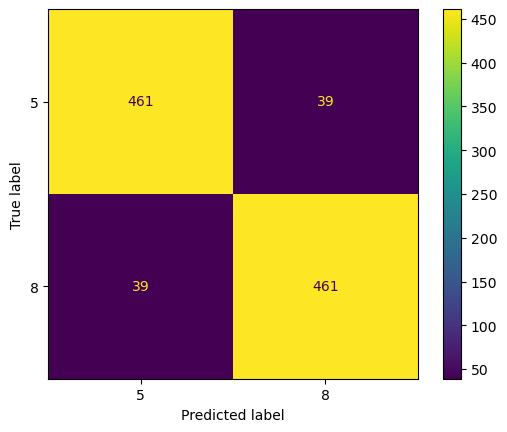

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = newModel.predict(testing[:, 0:100])
cm = confusion_matrix(testing[:,100], predictions, labels=newModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newModel.classes_)
disp.plot()
plt.show()

# MAKE SURE TO RUN MODEL ON TESTING SET

In [22]:
# plt.imshow(training[4][0:100].reshape(10,10), cmap='gray')
# plt.show()
# plt.imshow(training[5][0:100].reshape(10,10), cmap='gray')
# plt.show()
# plt.imshow(training[6][0:100].reshape(10,10), cmap='gray')
# plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
modelT = RandomForestClassifier(max_depth=6)
modelT.fit(X,y)
float(modelT.score(validation[:, 0:100], validation[:,100]))

0.971

In [27]:
import pickle as pk
n = 20
compiled_models = []


criterions = ['gini', 'entropy', 'log_loss']
max_depths = [5, 10, 15, 20 ,25, 30]
min_samples_splits = [2, 3, 4, 5]
min_samples_leafs = [1, 2, 3]
max_featurez = ['sqrt', 'log2', 'None']
bootstraps = [True, False]
oob_scores = [True, False]
warm_starts = [True, False]

counter = 0

for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits :
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_featurez:
                    for bootstrap in bootstraps:
                        for oob_score in oob_scores:
                            for warm_start in warm_starts:
                        
                                print(f"Compiled Model: {counter}\n")

                                try:
                                    model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, 
                                                                   min_samples_split = min_samples_split, 
                                                                   min_samples_leaf = min_samples_leaf, 
                                                                   max_features = max_features, 
                                                                   bootstrap = bootstrap, 
                                                                   oob_score = oob_score, 
                                                                   warm_start = warm_start).fit(X, y)
                                except:
                                    counter += 1
                                    continue

                                compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                                counter += 1

compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_TREE/Random_Forest_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

Compiled Model: 396

Compiled Model: 397

Compiled Model: 398

Compiled Model: 399

Compiled Model: 400

Compiled Model: 401

Compiled Model: 402

Compiled Model: 403

Compiled Model: 404

Compiled Model: 405

Compiled Model: 406

Compiled Model: 407

Compiled Model: 408

Compiled Model: 409

Compiled Model: 410

Compiled Model: 411

Compiled Model: 412

Compiled Model: 413

Compiled Model: 414

Compiled Model: 415

Compiled Model: 416

Compiled Model: 417

Compiled Model: 418

Compiled Model: 419

Compiled Model: 420

Compiled Model: 421

Compiled Model: 422

Compiled Model: 423

Compiled Model: 424

Compiled Model: 425

Compiled Model: 426

Compiled Model: 427

Compiled Model: 428

Compiled Model: 429

Compiled Model: 430

Compiled Model: 431

Compiled Model: 432

Compiled Model: 433

Compiled Model: 434

Compiled Model: 435

Compiled Model: 436

Compiled Model: 437

Compiled Model: 438

Compiled Model: 439

Compiled Model: 440

Compiled Model: 441

Compiled Model: 442

Compiled Mode

Compiled Model: 793

Compiled Model: 794

Compiled Model: 795

Compiled Model: 796

Compiled Model: 797

Compiled Model: 798

Compiled Model: 799

Compiled Model: 800

Compiled Model: 801

Compiled Model: 802

Compiled Model: 803

Compiled Model: 804

Compiled Model: 805

Compiled Model: 806

Compiled Model: 807

Compiled Model: 808

Compiled Model: 809

Compiled Model: 810

Compiled Model: 811

Compiled Model: 812

Compiled Model: 813

Compiled Model: 814

Compiled Model: 815

Compiled Model: 816

Compiled Model: 817

Compiled Model: 818

Compiled Model: 819

Compiled Model: 820

Compiled Model: 821

Compiled Model: 822

Compiled Model: 823

Compiled Model: 824

Compiled Model: 825

Compiled Model: 826

Compiled Model: 827

Compiled Model: 828

Compiled Model: 829

Compiled Model: 830

Compiled Model: 831

Compiled Model: 832

Compiled Model: 833

Compiled Model: 834

Compiled Model: 835

Compiled Model: 836

Compiled Model: 837

Compiled Model: 838

Compiled Model: 839

Compiled Mode

Compiled Model: 1177

Compiled Model: 1178

Compiled Model: 1179

Compiled Model: 1180

Compiled Model: 1181

Compiled Model: 1182

Compiled Model: 1183

Compiled Model: 1184

Compiled Model: 1185

Compiled Model: 1186

Compiled Model: 1187

Compiled Model: 1188

Compiled Model: 1189

Compiled Model: 1190

Compiled Model: 1191

Compiled Model: 1192

Compiled Model: 1193

Compiled Model: 1194

Compiled Model: 1195

Compiled Model: 1196

Compiled Model: 1197

Compiled Model: 1198

Compiled Model: 1199

Compiled Model: 1200

Compiled Model: 1201

Compiled Model: 1202

Compiled Model: 1203

Compiled Model: 1204

Compiled Model: 1205

Compiled Model: 1206

Compiled Model: 1207

Compiled Model: 1208

Compiled Model: 1209

Compiled Model: 1210

Compiled Model: 1211

Compiled Model: 1212

Compiled Model: 1213

Compiled Model: 1214

Compiled Model: 1215

Compiled Model: 1216

Compiled Model: 1217

Compiled Model: 1218

Compiled Model: 1219

Compiled Model: 1220

Compiled Model: 1221

Compiled M

Compiled Model: 1551

Compiled Model: 1552

Compiled Model: 1553

Compiled Model: 1554

Compiled Model: 1555

Compiled Model: 1556

Compiled Model: 1557

Compiled Model: 1558

Compiled Model: 1559

Compiled Model: 1560

Compiled Model: 1561

Compiled Model: 1562

Compiled Model: 1563

Compiled Model: 1564

Compiled Model: 1565

Compiled Model: 1566

Compiled Model: 1567

Compiled Model: 1568

Compiled Model: 1569

Compiled Model: 1570

Compiled Model: 1571

Compiled Model: 1572

Compiled Model: 1573

Compiled Model: 1574

Compiled Model: 1575

Compiled Model: 1576

Compiled Model: 1577

Compiled Model: 1578

Compiled Model: 1579

Compiled Model: 1580

Compiled Model: 1581

Compiled Model: 1582

Compiled Model: 1583

Compiled Model: 1584

Compiled Model: 1585

Compiled Model: 1586

Compiled Model: 1587

Compiled Model: 1588

Compiled Model: 1589

Compiled Model: 1590

Compiled Model: 1591

Compiled Model: 1592

Compiled Model: 1593

Compiled Model: 1594

Compiled Model: 1595

Compiled M

Compiled Model: 1924

Compiled Model: 1925

Compiled Model: 1926

Compiled Model: 1927

Compiled Model: 1928

Compiled Model: 1929

Compiled Model: 1930

Compiled Model: 1931

Compiled Model: 1932

Compiled Model: 1933

Compiled Model: 1934

Compiled Model: 1935

Compiled Model: 1936

Compiled Model: 1937

Compiled Model: 1938

Compiled Model: 1939

Compiled Model: 1940

Compiled Model: 1941

Compiled Model: 1942

Compiled Model: 1943

Compiled Model: 1944

Compiled Model: 1945

Compiled Model: 1946

Compiled Model: 1947

Compiled Model: 1948

Compiled Model: 1949

Compiled Model: 1950

Compiled Model: 1951

Compiled Model: 1952

Compiled Model: 1953

Compiled Model: 1954

Compiled Model: 1955

Compiled Model: 1956

Compiled Model: 1957

Compiled Model: 1958

Compiled Model: 1959

Compiled Model: 1960

Compiled Model: 1961

Compiled Model: 1962

Compiled Model: 1963

Compiled Model: 1964

Compiled Model: 1965

Compiled Model: 1966

Compiled Model: 1967

Compiled Model: 1968

Compiled M

Compiled Model: 2305

Compiled Model: 2306

Compiled Model: 2307

Compiled Model: 2308

Compiled Model: 2309

Compiled Model: 2310

Compiled Model: 2311

Compiled Model: 2312

Compiled Model: 2313

Compiled Model: 2314

Compiled Model: 2315

Compiled Model: 2316

Compiled Model: 2317

Compiled Model: 2318

Compiled Model: 2319

Compiled Model: 2320

Compiled Model: 2321

Compiled Model: 2322

Compiled Model: 2323

Compiled Model: 2324

Compiled Model: 2325

Compiled Model: 2326

Compiled Model: 2327

Compiled Model: 2328

Compiled Model: 2329

Compiled Model: 2330

Compiled Model: 2331

Compiled Model: 2332

Compiled Model: 2333

Compiled Model: 2334

Compiled Model: 2335

Compiled Model: 2336

Compiled Model: 2337

Compiled Model: 2338

Compiled Model: 2339

Compiled Model: 2340

Compiled Model: 2341

Compiled Model: 2342

Compiled Model: 2343

Compiled Model: 2344

Compiled Model: 2345

Compiled Model: 2346

Compiled Model: 2347

Compiled Model: 2348

Compiled Model: 2349

Compiled M

Compiled Model: 2679

Compiled Model: 2680

Compiled Model: 2681

Compiled Model: 2682

Compiled Model: 2683

Compiled Model: 2684

Compiled Model: 2685

Compiled Model: 2686

Compiled Model: 2687

Compiled Model: 2688

Compiled Model: 2689

Compiled Model: 2690

Compiled Model: 2691

Compiled Model: 2692

Compiled Model: 2693

Compiled Model: 2694

Compiled Model: 2695

Compiled Model: 2696

Compiled Model: 2697

Compiled Model: 2698

Compiled Model: 2699

Compiled Model: 2700

Compiled Model: 2701

Compiled Model: 2702

Compiled Model: 2703

Compiled Model: 2704

Compiled Model: 2705

Compiled Model: 2706

Compiled Model: 2707

Compiled Model: 2708

Compiled Model: 2709

Compiled Model: 2710

Compiled Model: 2711

Compiled Model: 2712

Compiled Model: 2713

Compiled Model: 2714

Compiled Model: 2715

Compiled Model: 2716

Compiled Model: 2717

Compiled Model: 2718

Compiled Model: 2719

Compiled Model: 2720

Compiled Model: 2721

Compiled Model: 2722

Compiled Model: 2723

Compiled M

Compiled Model: 3052

Compiled Model: 3053

Compiled Model: 3054

Compiled Model: 3055

Compiled Model: 3056

Compiled Model: 3057

Compiled Model: 3058

Compiled Model: 3059

Compiled Model: 3060

Compiled Model: 3061

Compiled Model: 3062

Compiled Model: 3063

Compiled Model: 3064

Compiled Model: 3065

Compiled Model: 3066

Compiled Model: 3067

Compiled Model: 3068

Compiled Model: 3069

Compiled Model: 3070

Compiled Model: 3071

Compiled Model: 3072

Compiled Model: 3073

Compiled Model: 3074

Compiled Model: 3075

Compiled Model: 3076

Compiled Model: 3077

Compiled Model: 3078

Compiled Model: 3079

Compiled Model: 3080

Compiled Model: 3081

Compiled Model: 3082

Compiled Model: 3083

Compiled Model: 3084

Compiled Model: 3085

Compiled Model: 3086

Compiled Model: 3087

Compiled Model: 3088

Compiled Model: 3089

Compiled Model: 3090

Compiled Model: 3091

Compiled Model: 3092

Compiled Model: 3093

Compiled Model: 3094

Compiled Model: 3095

Compiled Model: 3096

Compiled M

Compiled Model: 3433

Compiled Model: 3434

Compiled Model: 3435

Compiled Model: 3436

Compiled Model: 3437

Compiled Model: 3438

Compiled Model: 3439

Compiled Model: 3440

Compiled Model: 3441

Compiled Model: 3442

Compiled Model: 3443

Compiled Model: 3444

Compiled Model: 3445

Compiled Model: 3446

Compiled Model: 3447

Compiled Model: 3448

Compiled Model: 3449

Compiled Model: 3450

Compiled Model: 3451

Compiled Model: 3452

Compiled Model: 3453

Compiled Model: 3454

Compiled Model: 3455

Compiled Model: 3456

Compiled Model: 3457

Compiled Model: 3458

Compiled Model: 3459

Compiled Model: 3460

Compiled Model: 3461

Compiled Model: 3462

Compiled Model: 3463

Compiled Model: 3464

Compiled Model: 3465

Compiled Model: 3466

Compiled Model: 3467

Compiled Model: 3468

Compiled Model: 3469

Compiled Model: 3470

Compiled Model: 3471

Compiled Model: 3472

Compiled Model: 3473

Compiled Model: 3474

Compiled Model: 3475

Compiled Model: 3476

Compiled Model: 3477

Compiled M

Compiled Model: 3807

Compiled Model: 3808

Compiled Model: 3809

Compiled Model: 3810

Compiled Model: 3811

Compiled Model: 3812

Compiled Model: 3813

Compiled Model: 3814

Compiled Model: 3815

Compiled Model: 3816

Compiled Model: 3817

Compiled Model: 3818

Compiled Model: 3819

Compiled Model: 3820

Compiled Model: 3821

Compiled Model: 3822

Compiled Model: 3823

Compiled Model: 3824

Compiled Model: 3825

Compiled Model: 3826

Compiled Model: 3827

Compiled Model: 3828

Compiled Model: 3829

Compiled Model: 3830

Compiled Model: 3831

Compiled Model: 3832

Compiled Model: 3833

Compiled Model: 3834

Compiled Model: 3835

Compiled Model: 3836

Compiled Model: 3837

Compiled Model: 3838

Compiled Model: 3839

Compiled Model: 3840

Compiled Model: 3841

Compiled Model: 3842

Compiled Model: 3843

Compiled Model: 3844

Compiled Model: 3845

Compiled Model: 3846

Compiled Model: 3847

Compiled Model: 3848

Compiled Model: 3849

Compiled Model: 3850

Compiled Model: 3851

Compiled M

Compiled Model: 4180

Compiled Model: 4181

Compiled Model: 4182

Compiled Model: 4183

Compiled Model: 4184

Compiled Model: 4185

Compiled Model: 4186

Compiled Model: 4187

Compiled Model: 4188

Compiled Model: 4189

Compiled Model: 4190

Compiled Model: 4191

Compiled Model: 4192

Compiled Model: 4193

Compiled Model: 4194

Compiled Model: 4195

Compiled Model: 4196

Compiled Model: 4197

Compiled Model: 4198

Compiled Model: 4199

Compiled Model: 4200

Compiled Model: 4201

Compiled Model: 4202

Compiled Model: 4203

Compiled Model: 4204

Compiled Model: 4205

Compiled Model: 4206

Compiled Model: 4207

Compiled Model: 4208

Compiled Model: 4209

Compiled Model: 4210

Compiled Model: 4211

Compiled Model: 4212

Compiled Model: 4213

Compiled Model: 4214

Compiled Model: 4215

Compiled Model: 4216

Compiled Model: 4217

Compiled Model: 4218

Compiled Model: 4219

Compiled Model: 4220

Compiled Model: 4221

Compiled Model: 4222

Compiled Model: 4223

Compiled Model: 4224

Compiled M

Compiled Model: 4561

Compiled Model: 4562

Compiled Model: 4563

Compiled Model: 4564

Compiled Model: 4565

Compiled Model: 4566

Compiled Model: 4567

Compiled Model: 4568

Compiled Model: 4569

Compiled Model: 4570

Compiled Model: 4571

Compiled Model: 4572

Compiled Model: 4573

Compiled Model: 4574

Compiled Model: 4575

Compiled Model: 4576

Compiled Model: 4577

Compiled Model: 4578

Compiled Model: 4579

Compiled Model: 4580

Compiled Model: 4581

Compiled Model: 4582

Compiled Model: 4583

Compiled Model: 4584

Compiled Model: 4585

Compiled Model: 4586

Compiled Model: 4587

Compiled Model: 4588

Compiled Model: 4589

Compiled Model: 4590

Compiled Model: 4591

Compiled Model: 4592

Compiled Model: 4593

Compiled Model: 4594

Compiled Model: 4595

Compiled Model: 4596

Compiled Model: 4597

Compiled Model: 4598

Compiled Model: 4599

Compiled Model: 4600

Compiled Model: 4601

Compiled Model: 4602

Compiled Model: 4603

Compiled Model: 4604

Compiled Model: 4605

Compiled M

Compiled Model: 4935

Compiled Model: 4936

Compiled Model: 4937

Compiled Model: 4938

Compiled Model: 4939

Compiled Model: 4940

Compiled Model: 4941

Compiled Model: 4942

Compiled Model: 4943

Compiled Model: 4944

Compiled Model: 4945

Compiled Model: 4946

Compiled Model: 4947

Compiled Model: 4948

Compiled Model: 4949

Compiled Model: 4950

Compiled Model: 4951

Compiled Model: 4952

Compiled Model: 4953

Compiled Model: 4954

Compiled Model: 4955

Compiled Model: 4956

Compiled Model: 4957

Compiled Model: 4958

Compiled Model: 4959

Compiled Model: 4960

Compiled Model: 4961

Compiled Model: 4962

Compiled Model: 4963

Compiled Model: 4964

Compiled Model: 4965

Compiled Model: 4966

Compiled Model: 4967

Compiled Model: 4968

Compiled Model: 4969

Compiled Model: 4970

Compiled Model: 4971

Compiled Model: 4972

Compiled Model: 4973

Compiled Model: 4974

Compiled Model: 4975

Compiled Model: 4976

Compiled Model: 4977

Compiled Model: 4978

Compiled Model: 4979

Compiled M

In [41]:
import pickle as pk
n = 20
compiled_models = []


criterions = ['entropy', 'log_loss']
max_depths = [45, 40, 35, 30, 25]
min_samples_splits = [2, 3, 4, 5]
min_samples_leafs = [2, 3]
max_featurez = ['log2', 'None']
bootstraps = [True, False]
warm_starts = [True, False]

counter = 0

for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits :
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_featurez:
                    for bootstrap in bootstraps:
                        for warm_start in warm_starts:

                            print(f"Compiled Model: {counter}\n")

                            try:
                                model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, 
                                                               min_samples_split = min_samples_split, 
                                                               min_samples_leaf = min_samples_leaf, 
                                                               max_features = max_features, 
                                                               bootstrap = bootstrap, 
                                                               warm_start = warm_start).fit(X, y)
                            except:
                                counter += 1
                                continue

                            compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                            counter += 1

compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_TREE/Random_Forest_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

Compiled Model: 396

Compiled Model: 397

Compiled Model: 398

Compiled Model: 399

Compiled Model: 400

Compiled Model: 401

Compiled Model: 402

Compiled Model: 403

Compiled Model: 404

Compiled Model: 405

Compiled Model: 406

Compiled Model: 407

Compiled Model: 408

Compiled Model: 409

Compiled Model: 410

Compiled Model: 411

Compiled Model: 412

Compiled Model: 413

Compiled Model: 414

Compiled Model: 415

Compiled Model: 416

Compiled Model: 417

Compiled Model: 418

Compiled Model: 419

Compiled Model: 420

Compiled Model: 421

Compiled Model: 422

Compiled Model: 423

Compiled Model: 424

Compiled Model: 425

Compiled Model: 426

Compiled Model: 427

Compiled Model: 428

Compiled Model: 429

Compiled Model: 430

Compiled Model: 431

Compiled Model: 432

Compiled Model: 433

Compiled Model: 434

Compiled Model: 435

Compiled Model: 436

Compiled Model: 437

Compiled Model: 438

Compiled Model: 439

Compiled Model: 440

Compiled Model: 441

Compiled Model: 442

Compiled Mode

In [79]:
# Bestmodel = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
#                        max_features='log2', min_samples_leaf=2,
#                        min_samples_split=4).fit(X,y)
# Bestmodel.score(validation[:, 0:100], validation[:,100])

In [78]:
import pickle as pk
file = open('/Users/achyuth/Desktop/176Proj/Part 1/PIKLE_TREE/Random_Forest_0', 'rb')
modelT = pk.load(file)
file.close()
# modelT.predict(training[4:7, 0:100])
modelT.score(testing[:, 0:100], testing[:,100])

0.975

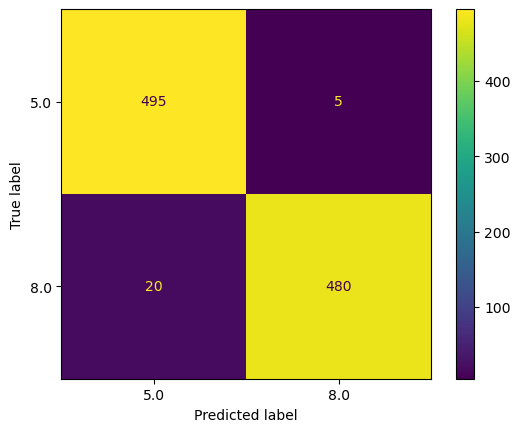

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = modelT.predict(testing[:, 0:100])
cm = confusion_matrix(testing[:,100], predictions, labels=modelT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelT.classes_)
disp.plot()
plt.show()